# This notebook is used for RV illustrations for a 3700K M-dwarf template. 
## Created by Chenyang Ji in 2024.11.28 as plot_rv.ipynb.
## Modified by Chenyang Ji in 2024.12.17 for paper.
## Copied by CHenyang Ji in 2025.1.15 from final_plots.ipynb for Discussion and Appendix.
---
### Containing four situations:
1. Only photon noises, including Poisson noise and read noise.
2. Only cal-sci contamination, without photon noise and sci-sci contamination.
3. Only sci-sci contamination, without photon noise and sci-sci contamination.
4. CHORUS setting, including photon noises and cross-contamination according to instrumental setup.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pwd = os.path.dirname(os.path.abspath(os.getcwd()))
pwd

'/mnt/beegfs_data/work/joanneji/CHORUS_work'

In [3]:
# order information
order_num_blue = np.arange(86, 114, 1)
order_num_red = np.arange(60, 87, 1)
order_num = {'red': order_num_red, 'blue': order_num_blue}
order = np.concatenate([order_num['blue'], order_num['red']])

In [4]:
# define median absolute deviation
def mad(data, axis=None):
    median = np.median(data, axis=axis)
    # make median into a vector according to the axis
    if axis is not None:
        median = np.expand_dims(median, axis=axis)
    return np.median(np.abs(data - median), axis=axis)

a = [[1, 2, 3], [4, 6, 7]]
mad(a, axis=1)

array([1., 1.])

In [5]:
# a = np.ones((100, len(order_num_red), 3))
a = np.array([[[1, 2], [2, 3] ,[3, 4]],
     [[5, 6], [7, 8] ,[9, 0]]])
print(np.shape(a), a[0, :, :])
# Split the array along the last axis and concatenate
# a1 = np.concatenate([a[:, :, i] for i in [range(2)]], axis=1)
a1 = np.hstack([a[:, :, i] for i in range(2)])
# should be (100, 27*3)
a2 = np.median(a1, axis=1)
print(a1)
print(a2)

(2, 3, 2) [[1 2]
 [2 3]
 [3 4]]
[[1 2 3 2 3 4]
 [5 7 9 6 8 0]]
[2.5 6.5]


## 1. Only photon noises.

### 1.1 RV v.s. order, scattered plot

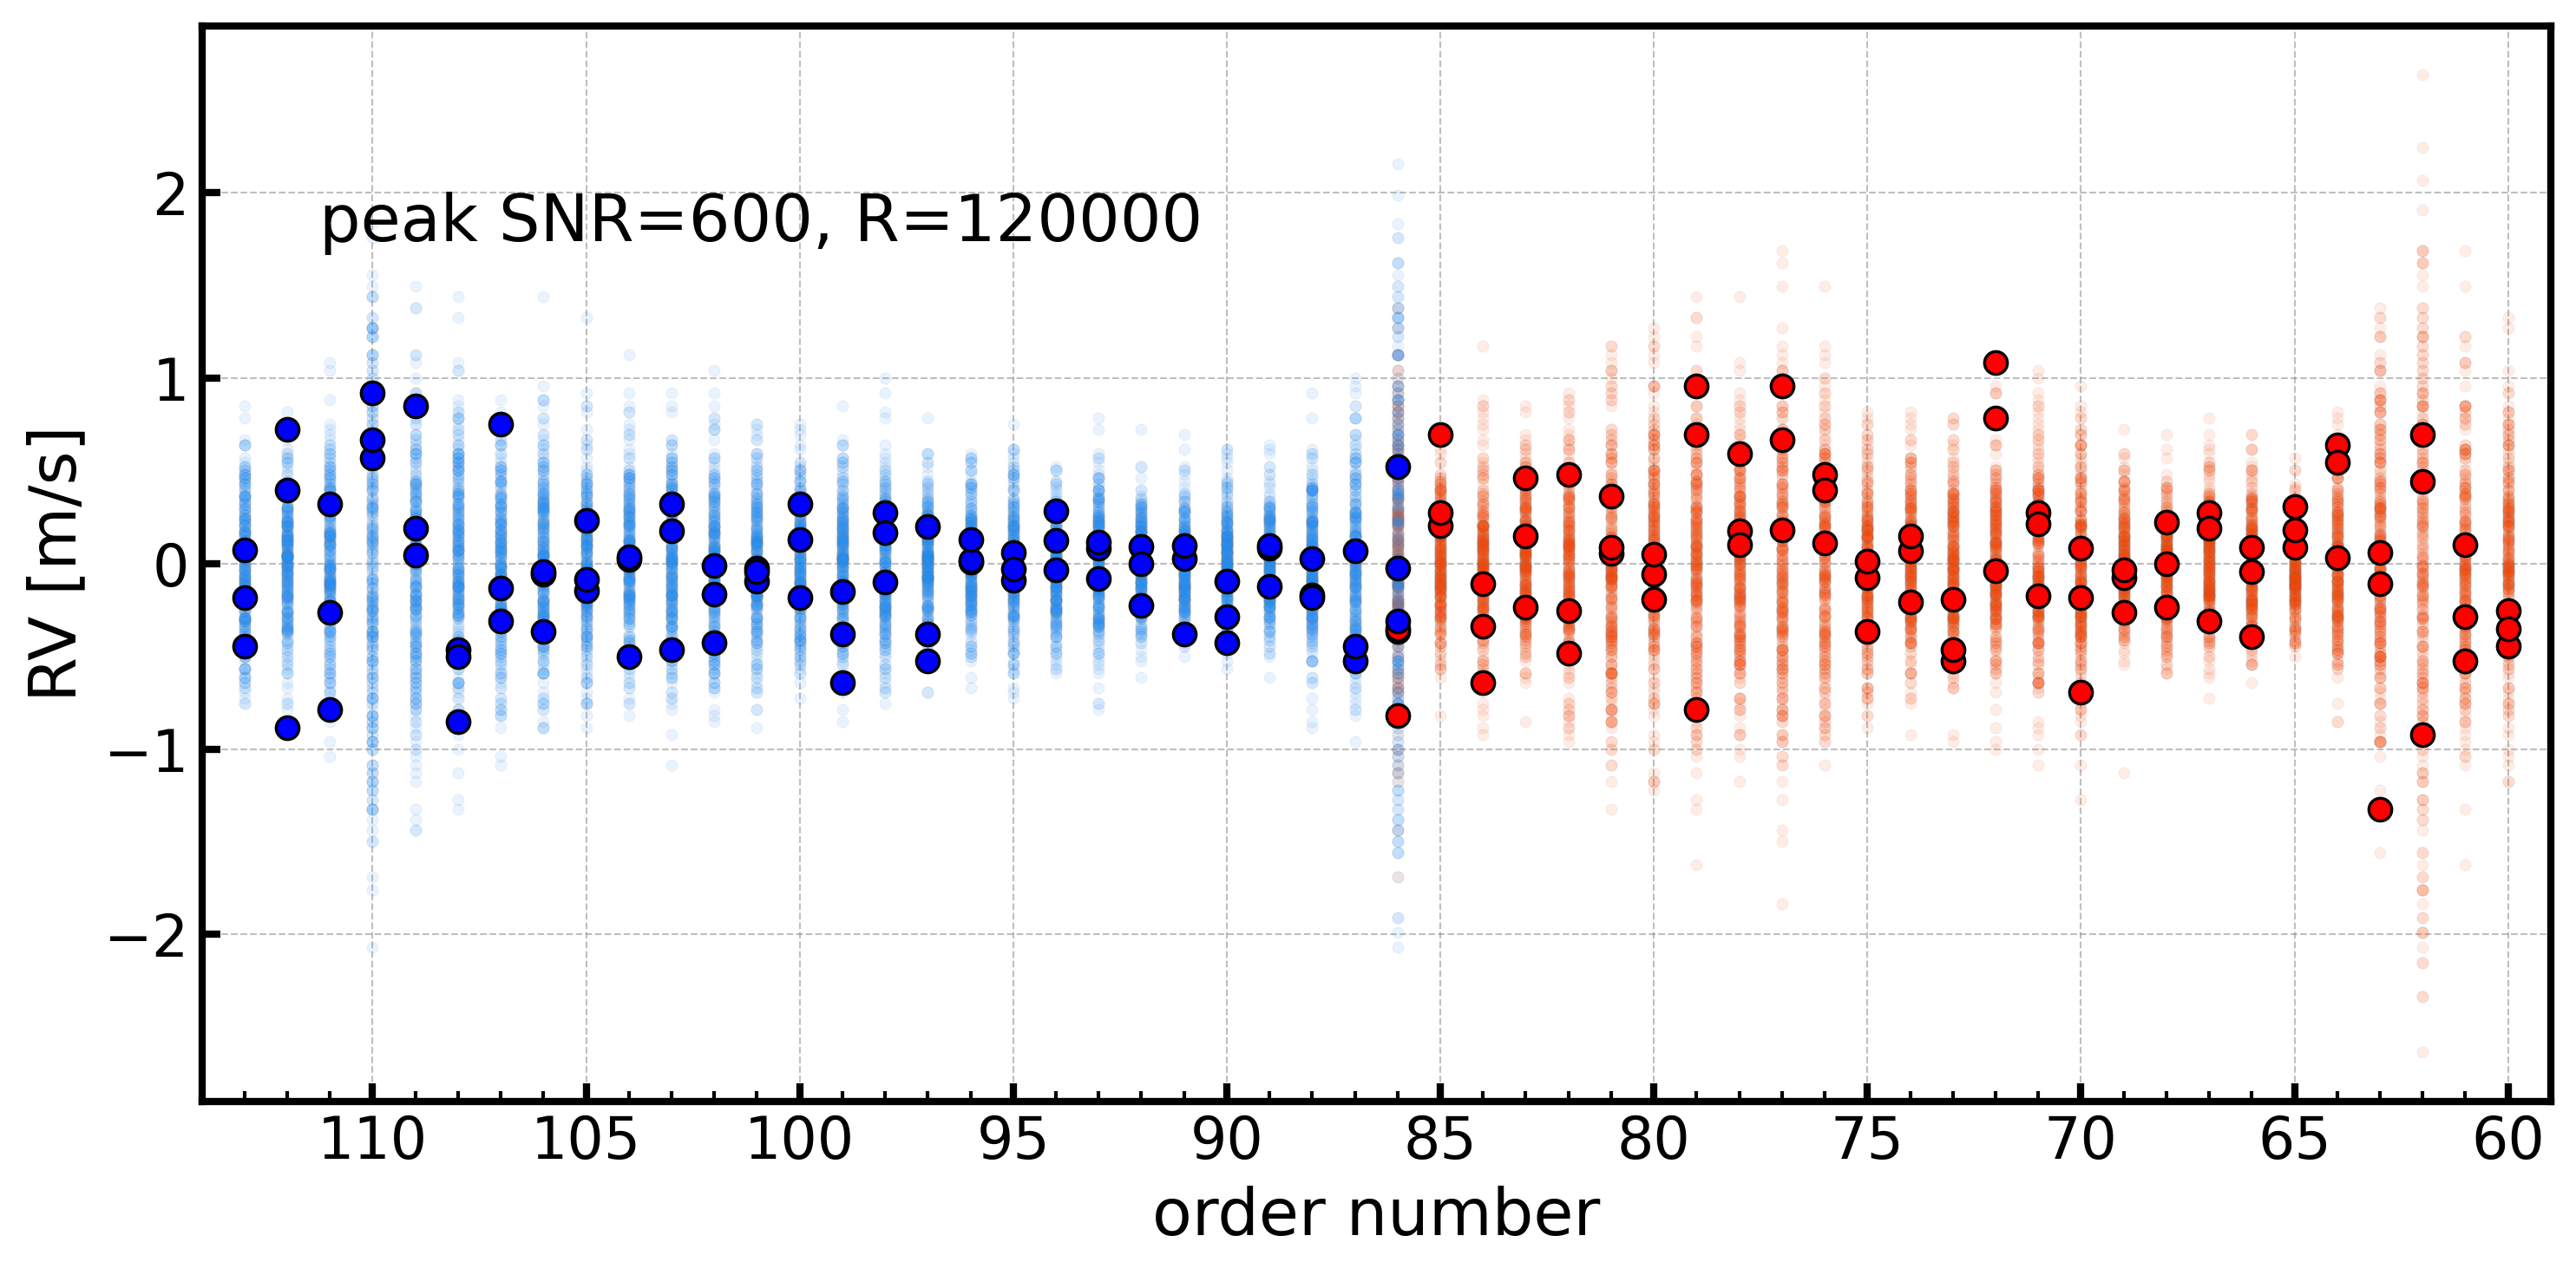

In [6]:
SNR_values = [100, 200, 300, 400, 500, 600, 700, 800]
R_values = [120000]
nspec = 100

# load and plot SNR=600
snr = 600
R = 120000
rv_all_red = np.zeros((nspec, len(order_num_red), 3))
rv_all_blue = np.zeros((nspec, len(order_num_blue), 3))
plt.figure(figsize=(10, 5), dpi=300)
# red band
for ispec in range(nspec):
    output_folder = os.path.join(pwd, f"output/synfile_nocont_m/snr{snr}")
    filename = f"{R}_{ispec}_red.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    rv = data['RV']
    rv_all_red[ispec, :, :] = rv
    # mark the first observation
    if ispec == 0:
        plt.scatter(order_num['red'], rv[:, 0], s=40, edgecolors='black', linewidths=0.8, c='red', zorder=5)
        plt.scatter(order_num['red'], rv[:, 1], s=40, edgecolors='black', linewidths=0.8, c='red', zorder=5)
        plt.scatter(order_num['red'], rv[:, 2], s=40, edgecolors='black', linewidths=0.8, c='red', zorder=5)
    else:
        plt.scatter(order_num['red'], rv[:, 0], s=10, edgecolors='gray', linewidth=0.2, c='orangered', alpha=0.1, zorder=3)
        plt.scatter(order_num['red'], rv[:, 1], s=10, edgecolors='gray', linewidth=0.2, c='orangered', alpha=0.1, zorder=3)
        plt.scatter(order_num['red'], rv[:, 2], s=10, edgecolors='gray', linewidth=0.2, c='orangered', alpha=0.1, zorder=3)
# blue band
for ispec in range(nspec):
    output_folder = os.path.join(pwd, f"output/synfile_nocont_m/snr{snr}")
    filename = f"{R}_{ispec}_blue.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    rv = data['RV']
    rv_all_blue[ispec, :, :] = rv
    # mark the first observation
    if ispec == 0:
        plt.scatter(order_num['blue'], rv[:, 0], s=40, edgecolors='black', linewidths=0.8, c='blue', zorder=5)
        plt.scatter(order_num['blue'], rv[:, 1], s=40, edgecolors='black', linewidths=0.8, c='blue', zorder=5)
        plt.scatter(order_num['blue'], rv[:, 2], s=40, edgecolors='black', linewidths=0.8, c='blue', zorder=5)
    else:
        plt.scatter(order_num['blue'], rv[:, 0], s=10, edgecolors='gray', linewidth=0.2, c='dodgerblue', alpha=0.1, zorder=3)
        plt.scatter(order_num['blue'], rv[:, 1], s=10, edgecolors='gray', linewidth=0.2, c='dodgerblue', alpha=0.1, zorder=3)
        plt.scatter(order_num['blue'], rv[:, 2], s=10, edgecolors='gray', linewidth=0.2, c='dodgerblue', alpha=0.1, zorder=3)

# # concatenate the red band into the shape of (nspec*3, len(order)), joining 3 traces for one order
# # calculate the median and std of each order, combining three traces for one order
# # red band
# rv_all_red_transformed = np.hstack(rv_all_red[:, :, :])
# rv_median_red = np.median(rv_all_red_transformed, axis=1)
# rv_std_red = np.std(rv_all_red_transformed, axis=1)
# # plt.errorbar(order_num['red'], rv_median_red, yerr=rv_std_red, fmt='o', color='red', ms=10, elinewidth=2, capsize=3, capthick=2, label='Red band', zorder=5)
# # blue band
# rv_all_blue_transformed = np.hstack(rv_all_blue[:, :, :])
# rv_median_blue = np.median(rv_all_blue_transformed, axis=1)
# rv_std_blue = np.std(rv_all_blue_transformed, axis=1)
# # plt.errorbar(order_num['blue'], rv_median_blue, yerr=rv_std_blue, fmt='o', color='blue', ms=10, elinewidth=2, capsize=3, capthick=2, label='Blue band', zorder=5)

# print(f"SNR={snr}, RV median in the red band: {np.median(rv_median_red)}m/s, std: {np.std(rv_median_red)}m/s")
# print(f"SNR={snr}, RV median in the blue band: {np.median(rv_median_blue)}m/s, std: {np.std(rv_median_blue)}m/s")

# Major and minor x-ticks
order = np.arange(110, 59, -5)  # Major ticks
plt.xticks(order, fontsize=16)
plt.yticks(fontsize=16)
plt.gca().xaxis.set_minor_locator(plt.FixedLocator(np.linspace(60, 113, 27+27)))  # Minor ticks

# Tick formatting
plt.tick_params(axis='x', which='major', direction='in', width=2, length=5)  # Major ticks inside
plt.tick_params(axis='x', which='minor', direction='in', width=1, length=3)  # Minor ticks inside
plt.tick_params(axis='y', which='both', direction='in', width=2, length=5)  # y-ticks inside

# Thicker outer boundary
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Axis limits and inversion
plt.xlim(59, 114)
plt.gca().invert_xaxis()

# Labels and title
plt.xlabel('order number', fontsize=18)
plt.ylabel('RV [m/s]', fontsize=18)

# annotate the SNR and R value
plt.annotate(f"peak SNR={snr}, R={R}", xy=(0.05, 0.8), xycoords='axes fraction', fontsize=18)

# Grid formatting
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
plt.tight_layout()

# plt.savefig(os.path.join(pwd, 'output/paper_plots/scattered.png'), dpi=300)
plt.show()


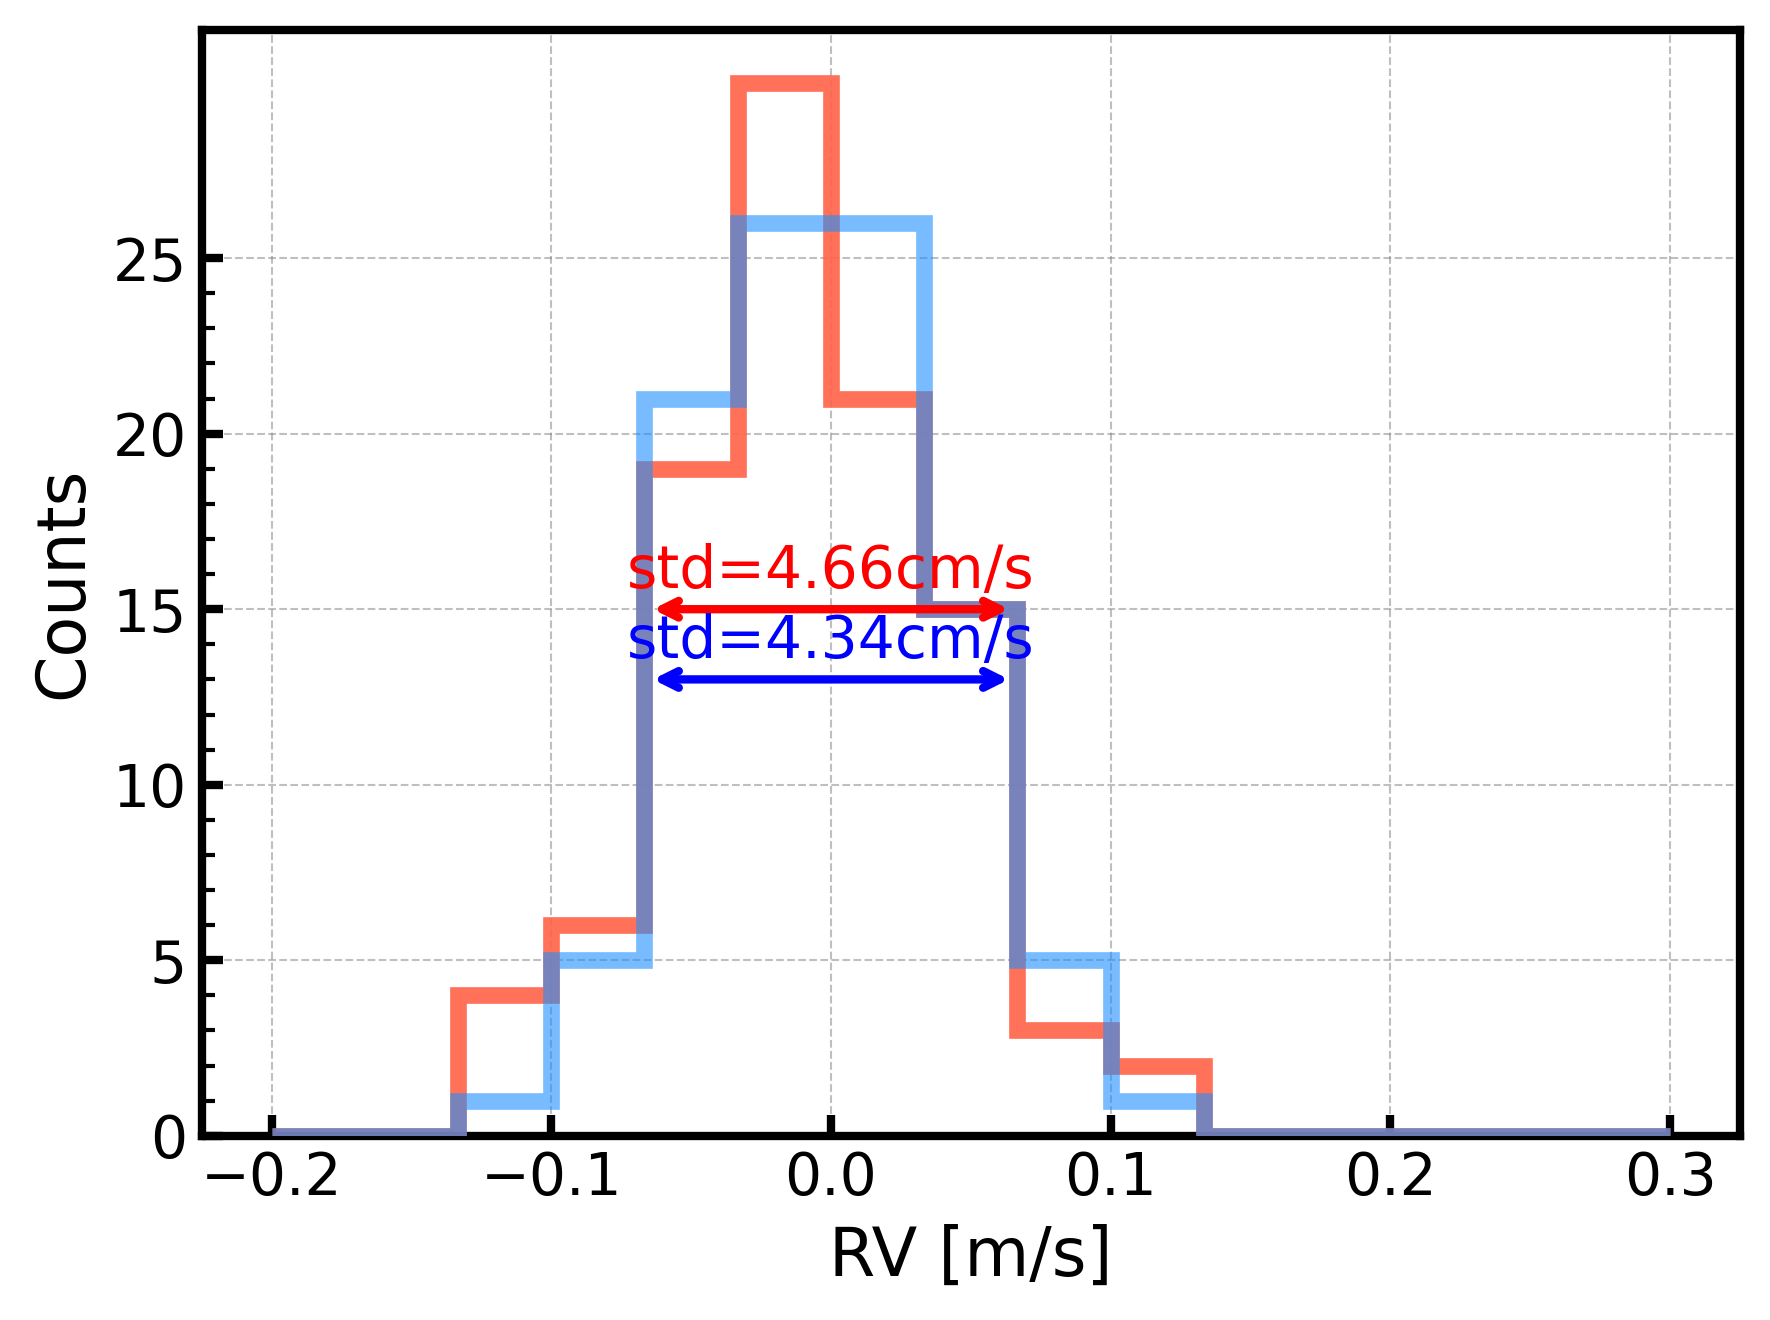

In [7]:
# plot the histogram of RVs at 100 observations
# stack three traces for each order, and the matrix shape should be (nspec, len(order)*3)
rv_red_nspec = np.concatenate(np.stack(rv_all_red, axis=1), axis=1)  # (100, 27*3)
rv_blue_nspec = np.concatenate(np.stack(rv_all_blue, axis=1), axis=1)  # (100, 28*3)
# RVs of each observations
rv_red_nspec_median = np.median(rv_red_nspec, axis=1)
rv_blue_nspec_median = np.median(rv_blue_nspec, axis=1)

# histogram of RVs in the red and blue band in one plot
plt.figure(figsize=(6, 4.5), dpi=300)
bins = np.arange(-0.2, 0.31, 1/30)
hist_red, bin_edges_red = np.histogram(rv_red_nspec_median, bins=bins)
hist_blue, bin_edges_blue = np.histogram(rv_blue_nspec_median, bins=bins)

# Plot histograms
plt.hist(rv_red_nspec_median, bins=bins, histtype='step', align='mid',
         color='red', alpha=0.9, zorder=3,
         edgecolor='tomato', linewidth=4)
plt.hist(rv_blue_nspec_median, bins=bins, histtype='step', align='mid',
         color='blue', alpha=0.6, zorder=3,
         edgecolor='dodgerblue', linewidth=4)

# the x ticks is the bin edges
plt.xticks(fontsize=14)
plt.xlabel('RV [m/s]', fontsize=16)
plt.yticks(np.arange(0, 26, 5), fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.FixedLocator(np.arange(0, 26, 1)))  # Minor ticks
plt.ylabel('Counts', fontsize=16)

# Tick formatting
plt.tick_params(axis='x', which='major', direction='in', width=2, length=5)  # Major ticks inside
plt.tick_params(axis='y', which='major', direction='in', width=2, length=5)  # y-ticks inside
plt.tick_params(axis='y', which='minor', direction='in', width=1, length=3)  # Minor ticks inside

# Thicker outer boundary
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# annotate the SNR and R value
# plt.annotate(f"peak SNR={snr}, R={R}", xy=(0.425, 0.8), xycoords='axes fraction', fontsize=15)

# ---------- FWHM start ----------
# Calculate FWHM for red and blue bands
def calculate_fwhm(hist, bin_edges):
    half_max = max(hist) / 2
    indices = np.where(hist >= half_max)[0]
    fwhm_start = bin_edges[indices[0]]
    fwhm_end = bin_edges[indices[-1] + 1]
    return fwhm_start, fwhm_end, half_max

fwhm_red_start, fwhm_red_end, half_max_red = calculate_fwhm(hist_red, bin_edges_red)
fwhm_blue_start, fwhm_blue_end, half_max_blue = calculate_fwhm(hist_blue, bin_edges_blue)

# Add double-headed arrows for FWHM
plt.annotate('', xy=(fwhm_red_start, half_max_red), xytext=(fwhm_red_end, half_max_red),
                arrowprops=dict(arrowstyle='<->', color='red', lw=2), zorder=10)
plt.annotate(f"std={np.std(rv_red_nspec_median*100):.2f}cm/s", xy=((fwhm_red_start + fwhm_red_end) / 2, half_max_red + 0.6),
                ha='center', color='red', fontsize=14, zorder=10)

plt.annotate('', xy=(fwhm_blue_start, half_max_blue), xytext=(fwhm_blue_end, half_max_blue),
                arrowprops=dict(arrowstyle='<->', color='blue', lw=2), zorder=10)
plt.annotate(f"std={np.std(rv_blue_nspec_median*100):.2f}cm/s", xy=((fwhm_blue_start + fwhm_blue_end) / 2, half_max_blue + 0.6),
                ha='center', color='blue', fontsize=14, zorder=10)
# ---------- FWHM end ----------

plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=1)
plt.tight_layout()

# plt.savefig(os.path.join(pwd, 'output/paper_plots/histogram.png'), dpi=300)
plt.show()

### 1.2 RV precision v.s. resolution

In [8]:
# extract RV precision information
def rv_precision(snr_values, R):

    pre_red = np.zeros_like(snr_values, dtype=float)
    pre_blue = np.zeros_like(snr_values, dtype=float)

    for i, snr in enumerate(snr_values):
        rv_all_red = np.zeros((nspec, len(order_num_red), 3))
        rv_all_blue = np.zeros((nspec, len(order_num_blue), 3))
        for ispec in range(nspec):
            output_folder = os.path.join(pwd, f"output/synfile_nocont_m/snr{snr}")
            filename = f"{R}_{ispec}_red.npz"
            filepath = os.path.join(output_folder, filename)
            data = np.load(filepath)
            rv = data['RV']
            rv_all_red[ispec, :, :] = rv
        for ispec in range(nspec):
            output_folder = os.path.join(pwd, f"output/synfile_nocont_m/snr{snr}")
            filename = f"{R}_{ispec}_blue.npz"
            filepath = os.path.join(output_folder, filename)
            data = np.load(filepath)
            rv = data['RV']
            rv_all_blue[ispec, :, :] = rv
        # red
        rv_all_red_transformed = np.hstack([rv_all_red[:, :, j] for j in range(3)])  # with shape (nspec, len(order)*3)
        rv_median_red = np.median(rv_all_red_transformed, axis=1)  # with shape (nspec,)
        # blue
        rv_all_blue_transformed = np.hstack([rv_all_blue[:, :, j] for j in range(3)])
        rv_median_blue = np.median(rv_all_blue_transformed, axis=1)
        # precision
        # std
        pre_red[i] = np.std(rv_median_red)
        pre_blue[i] = np.std(rv_median_blue)
        # MAD
        # pre_red[i] = mad(rv_median_red)
        # pre_blue[i] = mad(rv_median_blue)

    return pre_red, pre_blue

pre_red_m, pre_blue_m = rv_precision(SNR_values, 120000)

In [9]:
# create a matrix to store the RV precision for different R and SNR
pre_red = np.concatenate([pre_red_m[:, np.newaxis]], axis=1)
pre_blue = np.concatenate([pre_blue_m[:, np.newaxis]], axis=1)

np.savez('rv_precision_matrix_m.npz', SNR_values=SNR_values, R_values=120000, pre_red=pre_red, pre_blue=pre_blue)

In [10]:
data = np.load('rv_precision_matrix_m.npz')
pre_red_m, pre_blue_m = data['pre_red'], data['pre_blue']
print(pre_red_m.shape)

data = np.load('rv_precision_matrix_k.npz')
pre_red_k, pre_blue_k = data['pre_red'], data['pre_blue']
print(pre_red_k.shape)

(8, 1)
(8, 1)


A relation between RV precision and SNR according to Bottom et al. 2013:
$$\sigma_\mathrm{RV} \propto R^{-1.2}$$

Mean SNR

In [11]:
mean_SNR_red_m = np.zeros(len(SNR_values))
mean_SNR_blue_m = np.zeros(len(SNR_values))

# the real SNR
for i, isnr in enumerate(SNR_values):
# for i, isnr in enumerate([2000]):
    # red
    output_folder = os.path.join(pwd, f"output/synfile_nocont_m/snr{isnr}")
    filename = f"{R}_0_red.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    flux = data['flux']
    order_SNR = np.sqrt(flux)
    # print(np.shape(order_SNR))
    median_SNR = np.mean(np.median(np.median(order_SNR, axis=2), axis=1))
    mean_SNR_red_m[i] = median_SNR
    # print(f"red: peak SNR at {isnr}, median SNR around {median_SNR:.0f}")
    # blue
    output_folder = os.path.join(pwd, f"output/synfile_nocont_m/snr{isnr}")
    filename = f"{R}_0_blue.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    flux = data['flux']
    order_SNR = np.sqrt(flux)
    median_SNR = np.mean(np.median(np.median(order_SNR, axis=2), axis=1))
    mean_SNR_blue_m[i] = median_SNR
    # print(f"blue: peak SNR at {isnr}, median SNR around {median_SNR:.0f}")

print(mean_SNR_red_m[0:8])
print(mean_SNR_blue_m[0:8])

[ 73.18880923 146.39012537 219.56463784 292.79151671 365.95243682
 439.13231818 512.34226327 585.54862905]
[ 47.3903646   94.77136809 142.16741588 189.57279874 236.93476988
 284.31146509 331.70234155 379.07407516]


In [12]:
mean_SNR_red_k = np.zeros(len(SNR_values))
mean_SNR_blue_k = np.zeros(len(SNR_values))

# the real SNR
for i, isnr in enumerate(SNR_values):
# for i, isnr in enumerate([2000]):
    # red
    output_folder = os.path.join(pwd, f"output/synfile_nocont_k/snr{isnr}")
    filename = f"{R}_0_red.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    flux = data['flux']
    order_SNR = np.sqrt(flux)
    # print(np.shape(order_SNR))
    median_SNR = np.mean(np.median(np.median(order_SNR, axis=2), axis=1))
    mean_SNR_red_k[i] = median_SNR
    # print(f"red: peak SNR at {isnr}, median SNR around {median_SNR:.0f}")
    # blue
    output_folder = os.path.join(pwd, f"output/synfile_nocont_k/snr{isnr}")
    filename = f"{R}_0_blue.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    flux = data['flux']
    order_SNR = np.sqrt(flux)
    median_SNR = np.mean(np.median(np.median(order_SNR, axis=2), axis=1))
    mean_SNR_blue_k[i] = median_SNR
    # print(f"blue: peak SNR at {isnr}, median SNR around {median_SNR:.0f}")

print(mean_SNR_red_k[0:8])
print(mean_SNR_blue_k[0:8])

[ 82.84840615 165.70328833 248.53647796 331.40964816 414.2596338
 497.08780587 579.93851546 662.7776596 ]
[ 51.68465142 103.37145613 155.05440641 206.73433494 258.41711768
 310.12114092 361.74437375 413.49287952]


## 4. CHORUS setting

SNR=600, RV median in the red band: -0.1470494732848302m/s, std: 0.06941965775684923m/s
SNR=600, RV median in the blue band: -0.11181254736717484m/s, std: 0.06013085545727339m/s


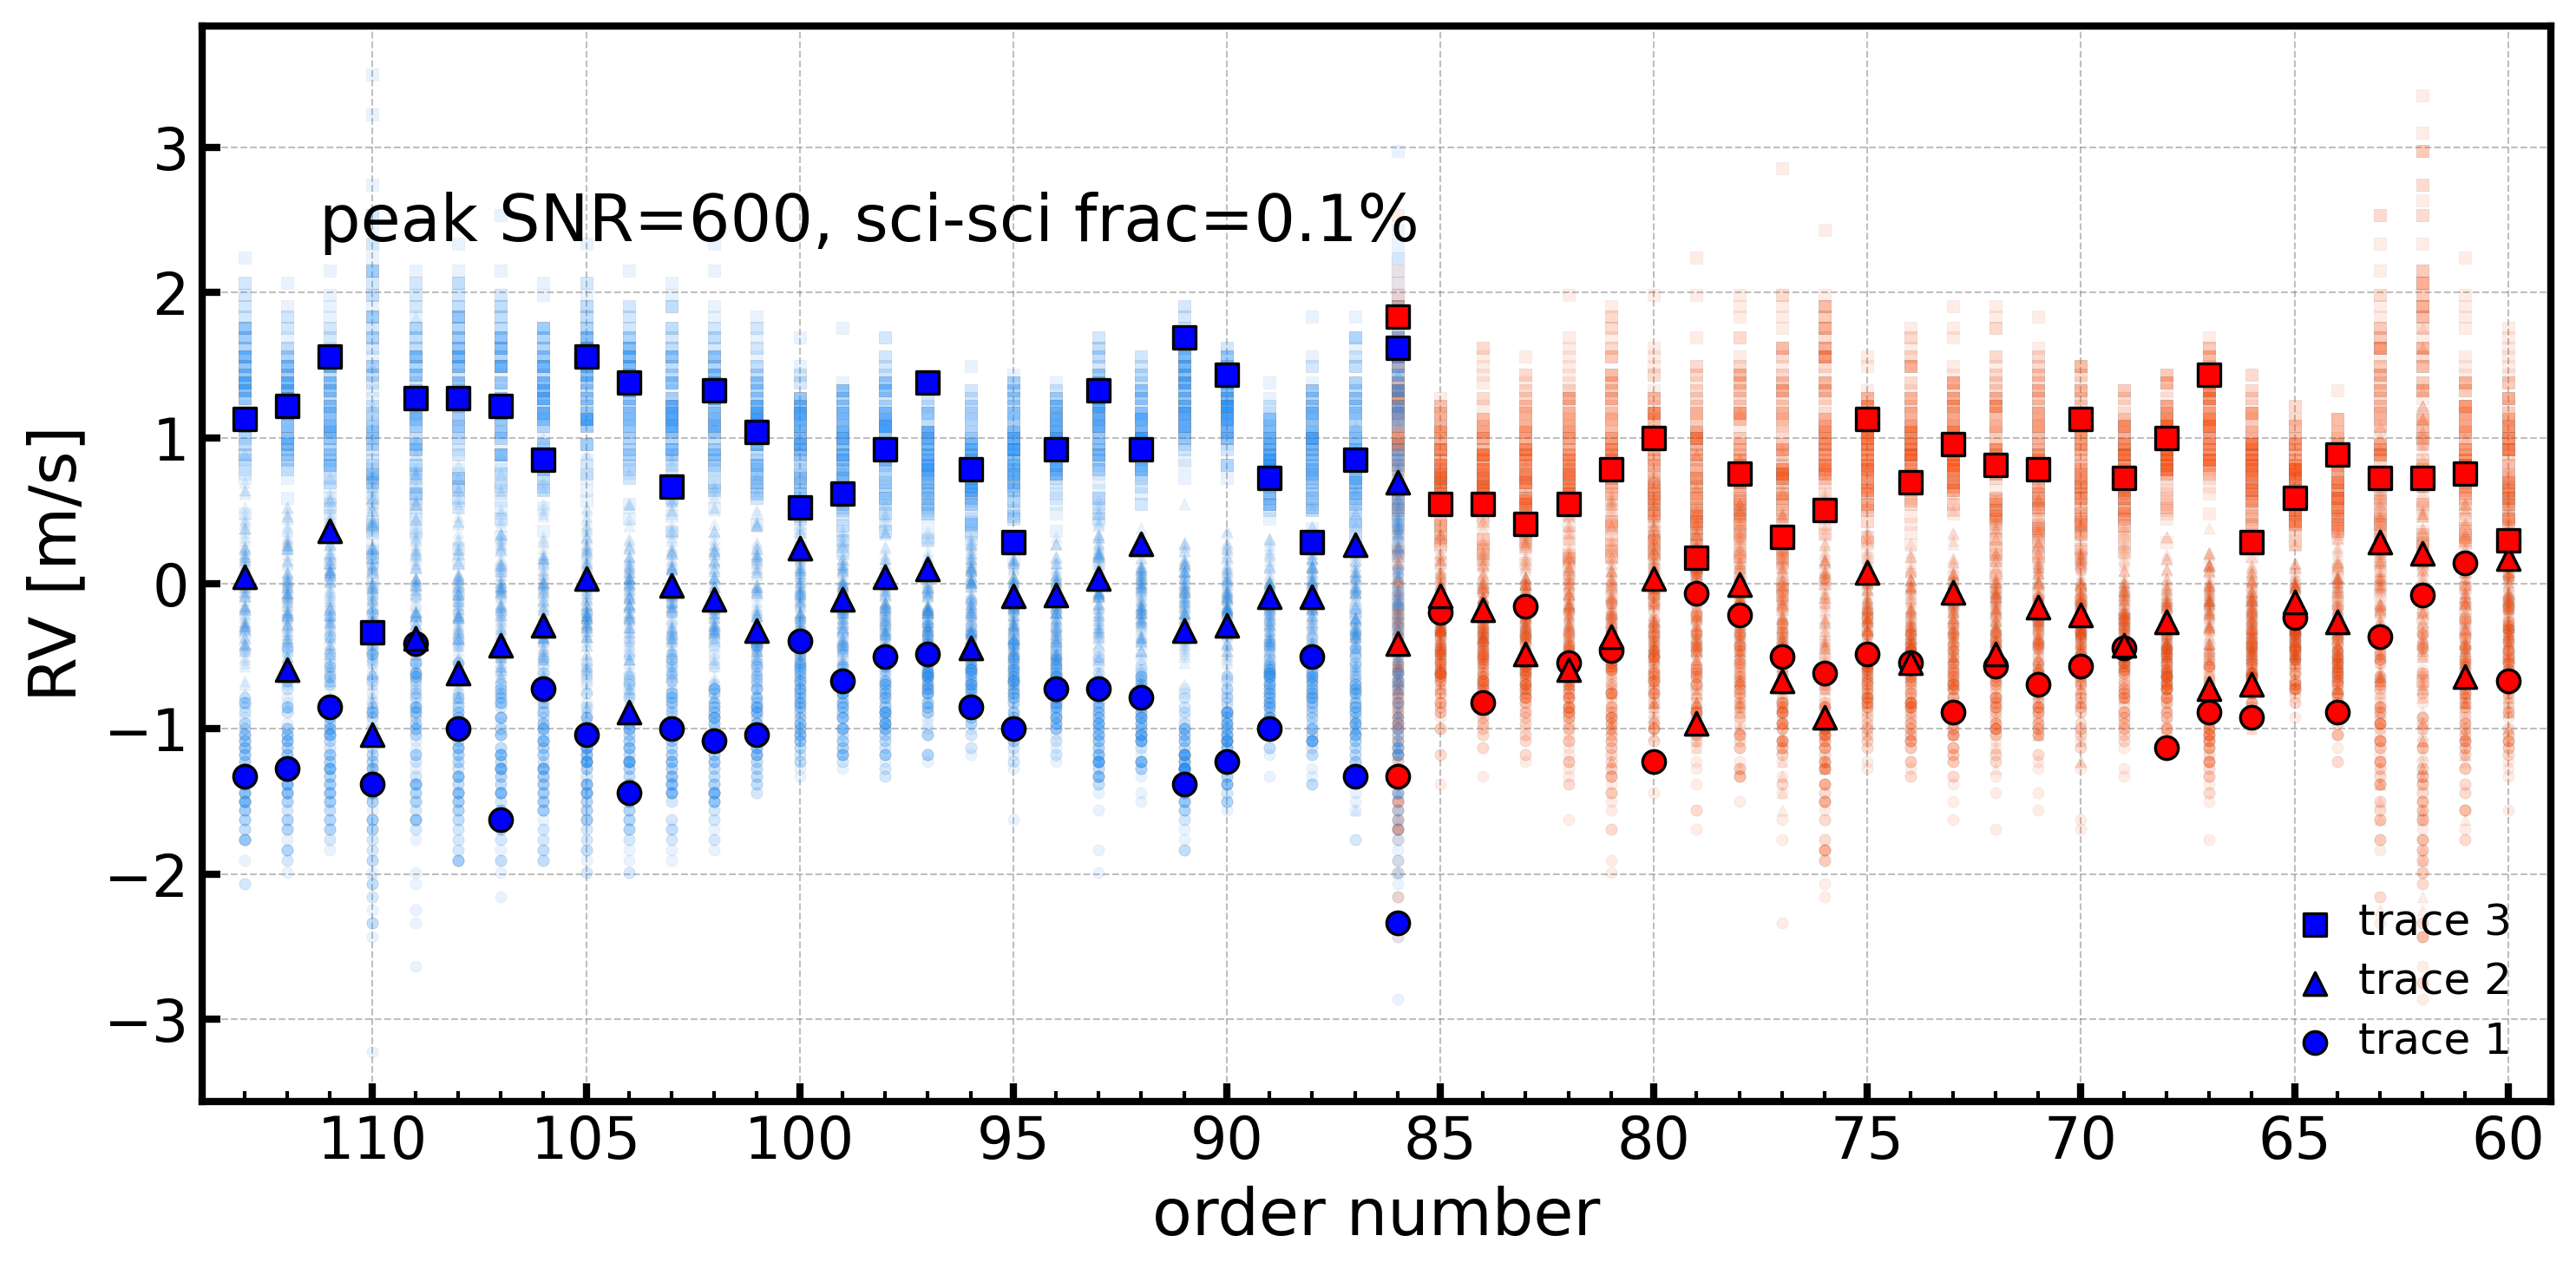

In [13]:
SNR_values = np.arange(100, 801, 100)
scisci_frac_values = [1e-3, 1e-4]
nspec = 100
R = 120000

# load and plot SNR=100
snr = 600
scisci_frac = 1e-3
rv_all_red = np.zeros((nspec, len(order_num_red), 3))
rv_all_blue = np.zeros((nspec, len(order_num_blue), 3))
plt.figure(figsize=(10, 5), dpi=300)
# red band
for ispec in range(nspec):
    output_folder = os.path.join(pwd, f"output/synfile_CHORUS_m/snr{snr}")
    filename = f"{scisci_frac}_{ispec}_red.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    rv = data['RV']
    rv_all_red[ispec, :, :] = rv
    # mark the first observation
    if ispec == 0:
        plt.scatter(order_num['red'], rv[:, 0], marker='o', s=40, edgecolors='black', linewidths=0.8, c='red', zorder=5)
        plt.scatter(order_num['red'], rv[:, 1], marker='^', s=40, edgecolors='black', linewidths=0.8, c='red', zorder=5)
        plt.scatter(order_num['red'], rv[:, 2], marker='s', s=40, edgecolors='black', linewidths=0.8, c='red', zorder=5)
    else:
        plt.scatter(order_num['red'], rv[:, 0], marker='o', s=10, edgecolors='gray', linewidth=0.2, c='orangered', alpha=0.1, zorder=3)
        plt.scatter(order_num['red'], rv[:, 1], marker='^', s=10, edgecolors='gray', linewidth=0.2, c='orangered', alpha=0.1, zorder=3)
        plt.scatter(order_num['red'], rv[:, 2], marker='s', s=10, edgecolors='gray', linewidth=0.2, c='orangered', alpha=0.1, zorder=3)
# blue band
for ispec in range(nspec):
    output_folder = os.path.join(pwd, f"output/synfile_CHORUS_m/snr{snr}")
    filename = f"{scisci_frac}_{ispec}_blue.npz"
    filepath = os.path.join(output_folder, filename)
    data = np.load(filepath)
    rv = data['RV']
    rv_all_blue[ispec, :, :] = rv
    # mark the first observation
    if ispec == 0:
        trace1 = plt.scatter(order_num['blue'], rv[:, 0], marker='o', s=40, edgecolors='black', linewidths=0.8, c='blue', zorder=5)
        trace2 = plt.scatter(order_num['blue'], rv[:, 1], marker='^', s=40, edgecolors='black', linewidths=0.8, c='blue', zorder=5)
        trace3 = plt.scatter(order_num['blue'], rv[:, 2], marker='s', s=40, edgecolors='black', linewidths=0.8, c='blue', zorder=5)
    else:
        plt.scatter(order_num['blue'], rv[:, 0], marker='o', s=10, edgecolors='gray', linewidth=0.2, c='dodgerblue', alpha=0.1, zorder=3)
        plt.scatter(order_num['blue'], rv[:, 1], marker='^', s=10, edgecolors='gray', linewidth=0.2, c='dodgerblue', alpha=0.1, zorder=3)
        plt.scatter(order_num['blue'], rv[:, 2], marker='s', s=10, edgecolors='gray', linewidth=0.2, c='dodgerblue', alpha=0.1, zorder=3)

# concatenate the red band into the shape of (nspec*3, len(order)), joining 3 traces for one order
# calculate the median and std of each order, combining three traces for one order
# red band
rv_all_red_transformed = np.hstack(rv_all_red[:, :, :])
rv_median_red = np.median(rv_all_red_transformed, axis=1)
rv_std_red = np.std(rv_all_red_transformed, axis=1)
# plt.errorbar(order_num['red'], rv_median_red, yerr=rv_std_red, fmt='o', color='red', ms=10, elinewidth=2, capsize=3, capthick=2, label='Red band', zorder=5)
# blue band
rv_all_blue_transformed = np.hstack(rv_all_blue[:, :, :])
rv_median_blue = np.median(rv_all_blue_transformed, axis=1)
rv_std_blue = np.std(rv_all_blue_transformed, axis=1)
# plt.errorbar(order_num['blue'], rv_median_blue, yerr=rv_std_blue, fmt='o', color='blue', ms=10, elinewidth=2, capsize=3, capthick=2, label='Blue band', zorder=5)

print(f"SNR={snr}, RV median in the red band: {np.median(rv_median_red)}m/s, std: {np.std(rv_median_red)}m/s")
print(f"SNR={snr}, RV median in the blue band: {np.median(rv_median_blue)}m/s, std: {np.std(rv_median_blue)}m/s")

# Major and minor x-ticks
order = np.arange(110, 59, -5)  # Major ticks
plt.xticks(order, fontsize=16)
plt.yticks(fontsize=16)
plt.gca().xaxis.set_minor_locator(plt.FixedLocator(np.linspace(60, 113, 27+27)))  # Minor ticks

# Tick formatting
plt.tick_params(axis='x', which='major', direction='in', width=2, length=5)  # Major ticks inside
plt.tick_params(axis='x', which='minor', direction='in', width=1, length=3)  # Minor ticks inside
plt.tick_params(axis='y', which='both', direction='in', width=2, length=5)  # y-ticks inside

# Thicker outer boundary
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Axis limits and inversion
plt.xlim(59, 114)
plt.gca().invert_xaxis()

# Labels and title
plt.xlabel('order number', fontsize=18)
plt.ylabel('RV [m/s]', fontsize=18)

# annotate the SNR and R value
plt.annotate(f"peak SNR={snr}, sci-sci frac=0.1%", xy=(0.05, 0.8), xycoords='axes fraction', fontsize=18)

# legend
plt.legend([trace3, trace2, trace1], ['trace 3', 'trace 2', 'trace 1'], loc='lower right', fontsize=12, frameon=False,
           ncol=1, bbox_to_anchor=(1, 0), labelspacing=0.4, columnspacing=1, handletextpad=0.4, handlelength=1.2)

# Grid formatting
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
plt.tight_layout()

# plt.savefig(os.path.join(pwd, 'output/paper_plots/scattered_CHORUS.png'), dpi=300)
plt.show()


In [14]:
# extract RV precision information
def rv_precision_cont(snr_values, R):

    pre_red = np.zeros_like(snr_values, dtype=float)
    pre_blue = np.zeros_like(snr_values, dtype=float)

    for i, snr in enumerate(snr_values):
        rv_all_red = np.zeros((nspec, len(order_num_red), 3))
        rv_all_blue = np.zeros((nspec, len(order_num_blue), 3))
        for ispec in range(nspec):
            output_folder = os.path.join(pwd, f"output/synfile_CHORUS_m/snr{snr}")
            filename = f"{R}_{ispec}_red.npz"
            filepath = os.path.join(output_folder, filename)
            data = np.load(filepath)
            rv = data['RV']
            rv_all_red[ispec, :, :] = rv
        for ispec in range(nspec):
            output_folder = os.path.join(pwd, f"output/synfile_CHORUS_m/snr{snr}")
            filename = f"{R}_{ispec}_blue.npz"
            filepath = os.path.join(output_folder, filename)
            data = np.load(filepath)
            rv = data['RV']
            rv_all_blue[ispec, :, :] = rv
        # red
        rv_all_red_transformed = np.hstack([rv_all_red[:, :, j] for j in range(3)])  # with shape (nspec, len(order)*3)
        rv_median_red = np.median(rv_all_red_transformed, axis=1)  # with shape (nspec,)
        # blue
        rv_all_blue_transformed = np.hstack([rv_all_blue[:, :, j] for j in range(3)])
        rv_median_blue = np.median(rv_all_blue_transformed, axis=1)
        # precision
        # std
        pre_red[i] = np.std(rv_median_red)
        pre_blue[i] = np.std(rv_median_blue)
        # MAD
        # pre_red[i] = mad(rv_median_red)
        # pre_blue[i] = mad(rv_median_blue)

    return pre_red, pre_blue

pre_red_conservative, pre_blue_conservative = rv_precision_cont(SNR_values, 1e-3)
pre_red_optimize, pre_blue_optimize = rv_precision_cont(SNR_values, 1e-4)

In [15]:
np.savez('rv_precision_cont_m.npz', pre_red_conservative=pre_red_conservative, pre_blue_conservative=pre_blue_conservative, pre_red_optimize=pre_red_optimize, pre_blue_optimize=pre_blue_optimize)

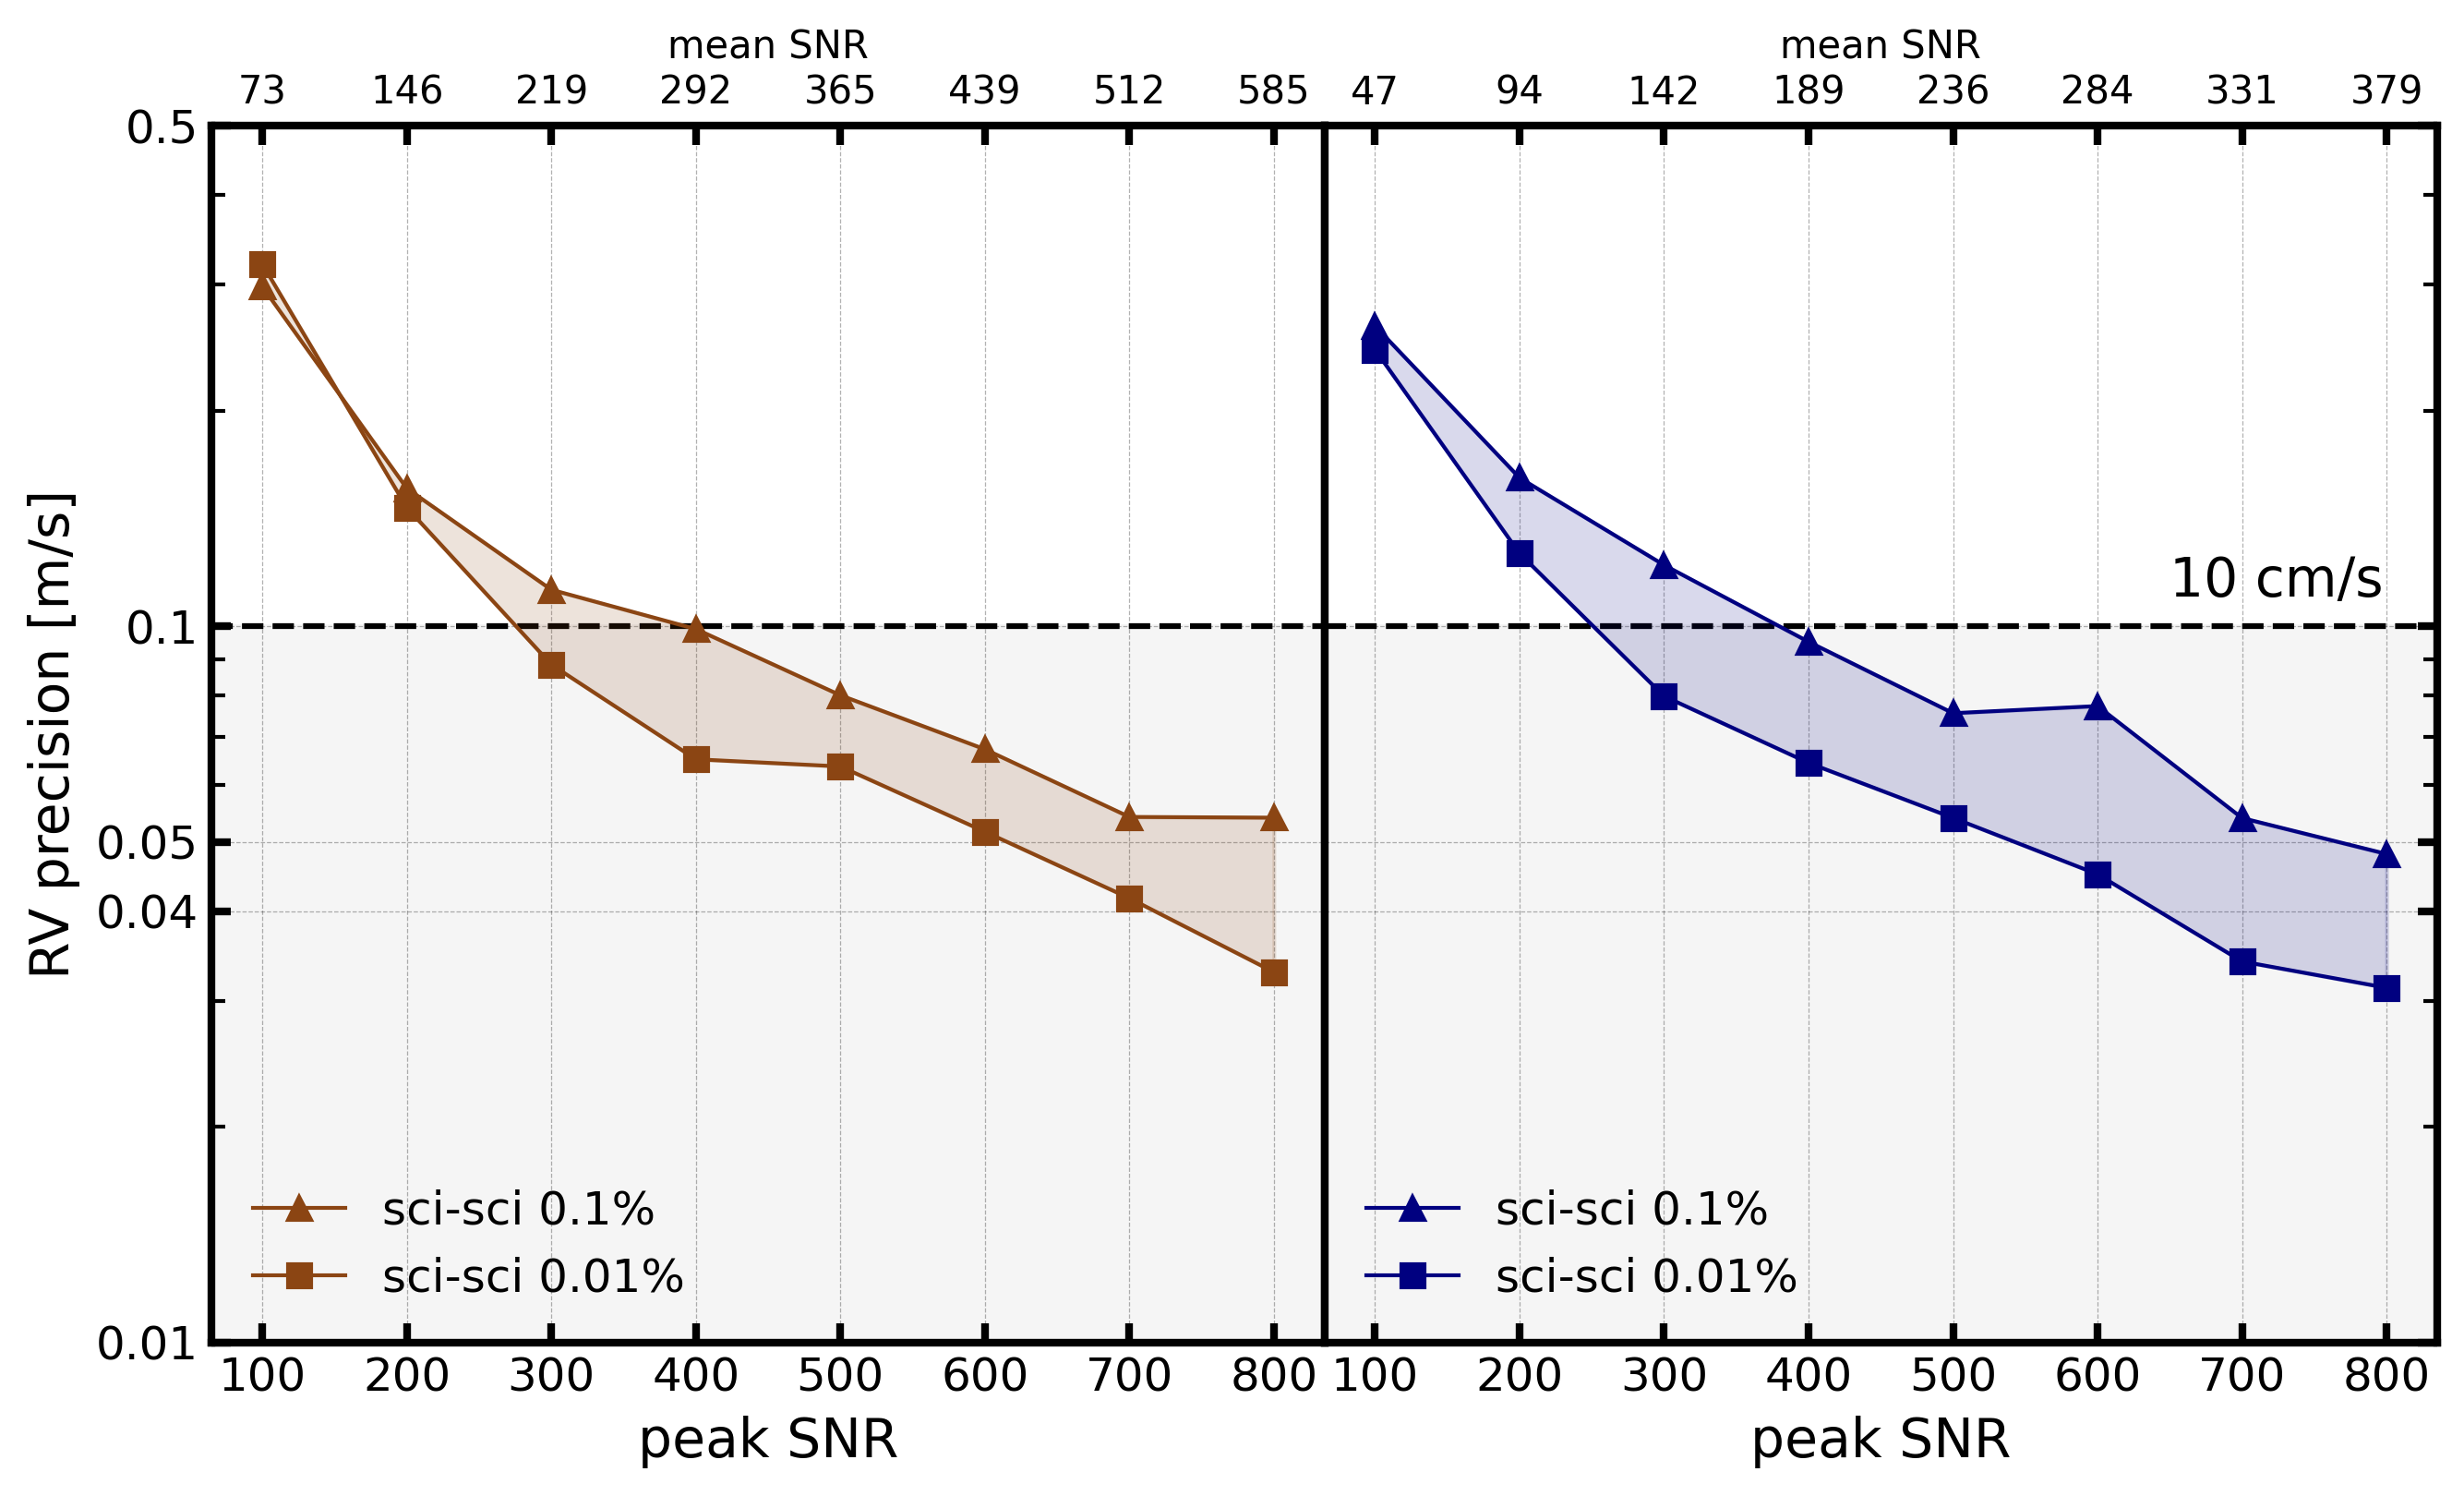

In [16]:
# Load data
# pre_red_12 = np.load('rv_precision_matrix_m.npz')['pre_red'][0:8, 4]
# pre_blue_12 = np.load('rv_precision_matrix_m.npz')['pre_blue'][0:8, 4]
pre_red_conservative, pre_red_optimize = np.load('rv_precision_cont_m.npz')['pre_red_conservative'], np.load('rv_precision_cont_m.npz')['pre_red_optimize']
pre_blue_conservative, pre_blue_optimize = np.load('rv_precision_cont_m.npz')['pre_blue_conservative'], np.load('rv_precision_cont_m.npz')['pre_blue_optimize']

# Set SNR values for x-axis
SNR_values = np.arange(100, 801, 100)

# color
# color_r = plt.cm.Reds((4 + 3) / 6)
# color_b = plt.cm.Blues((4 + 3) / 6)
color_r = 'saddlebrown'
color_b = 'navy'

# Create the figure and subplots with shared Y-axis and no space between
fig, axes = plt.subplots(1, 2, figsize=(9, 5.5), dpi=300, sharey=True, gridspec_kw={'wspace': 0})

# ---------- Left Plot ----------
ax_left = axes[0]
# ax_left.plot(SNR_values, pre_red_12, 'o-', label='R=120k', color=color_r, linewidth=2, ms=8, zorder=10, alpha=0.6)
ax_left.plot(SNR_values, pre_red_conservative, '^-', label='0.1%', linewidth=1, ms=6, color=color_r, zorder=6)
ax_left.plot(SNR_values, pre_red_optimize, 's-', label='0.01%', linewidth=1, ms=6, color=color_r, zorder=6)
ax_left.fill_between(SNR_values, pre_red_conservative, pre_red_optimize, color=color_r, alpha=0.15, zorder=3)

# Mark <10 cm/s area
ax_left.axhspan(0.01, 0.1, color='whitesmoke', zorder=0)
ax_left.axhline(y=0.1, color='k', linestyle='--', linewidth=1.5, zorder=1)

# Add annotation for 10 cm/s
# ax_left.annotate('10 cm/s', xy=(650, 0.11), fontsize=14, color='k', zorder=10)

# Grid and tick parameters
ax_left.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
ax_left.tick_params(axis='both', which='major', width=2, length=5, direction='in')

# ---------- Right Plot ----------
ax_right = axes[1]
# ax_right.plot(SNR_values, pre_blue_12, 'o-', label='R=120k', color=color_b, linewidth=2, ms=8, zorder=10, alpha=0.6)
ax_right.plot(SNR_values, pre_blue_conservative, '^-', label='0.1%', linewidth=1, ms=6, color=color_b, zorder=6)
ax_right.plot(SNR_values, pre_blue_optimize, 's-', label='0.01%', linewidth=1, ms=6, color=color_b, zorder=6)
ax_right.fill_between(SNR_values, pre_blue_conservative, pre_blue_optimize, color=color_b, alpha=0.15, zorder=3)

# Mark <10 cm/s area
ax_right.axhspan(0.01, 0.1, color='whitesmoke', zorder=0)
ax_right.axhline(y=0.1, color='k', linestyle='--', linewidth=1.5, zorder=1)

# Add annotation for 10 cm/s
ax_right.annotate('10 cm/s', xy=(650, 0.11), fontsize=14, color='k', zorder=10)

# Grid and tick parameters
ax_right.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
ax_right.tick_params(axis='both', which='major', width=2, length=5, direction='in')

# ---------- axes ----------
# Formatting for both subplots
for ax in axes:
    ax.set_yscale('log')
    ax.set_yticks([0.01, 0.04, 0.05, 0.1, 0.5])
    ax.set_yticklabels([0.01, 0.04, 0.05, 0.1, 0.5], fontsize=12)
    ax.set_ylim(0.01, 0.5)
    ax.set_xticks(np.arange(100, 801, 100))
    ax.set_xticklabels([f"{x:.0f}" for x in np.arange(100, 801, 100)], fontsize=12)
    ax.tick_params(axis='both', which='major', width=2, length=5, direction='in')  # Thicker ticks
    ax.tick_params(axis='both', which='minor', width=1, length=3.5, direction='in')  # Thicker ticks
    ax.grid(True, linestyle='--', color='k', linewidth=0.3, alpha=0.3)

# Left plot adjustments
axes[0].set_xlabel('peak SNR', fontsize=14)
axes[0].set_ylabel('RV precision [m/s]', fontsize=14)

# Right plot adjustments
axes[1].tick_params(left=False, labelleft=False)  # Remove left y-axis labels and ticks

# Move right y-ticks to the right side without labels
axes[1].yaxis.tick_right()
axes[1].tick_params(axis='y', which='both', labelright=False)  # Keep ticks but hide labels
axes[1].set_xlabel('peak SNR', fontsize=14)

# ---------- Upper X-Axes ----------
# Left plot
ax_top_left = ax_left.twiny()
ax_top_left.set_xticks(SNR_values)
ax_top_left.set_xticklabels([f"{int(x)}" for x in mean_SNR_red_m[0:8]], fontsize=10)
ax_top_left.tick_params(axis='x', which='major', direction='in', length=5, width=2)
ax_top_left.set_xlim(ax_left.get_xlim())
ax_top_left.set_xlabel('mean SNR', fontsize=10)

# Right plot
ax_top_right = ax_right.twiny()
ax_top_right.set_xticks(SNR_values)
ax_top_right.set_xticklabels([f"{int(x)}" for x in mean_SNR_blue_m[0:8]], fontsize=10)
ax_top_right.tick_params(axis='x', which='major', direction='in', length=5, width=2)
ax_top_right.set_xlim(ax_right.get_xlim())
ax_top_right.set_xlabel('mean SNR', fontsize=10)

# ---------- Legends ----------
ax_left.legend(['sci-sci 0.1%', 'sci-sci 0.01%'], fontsize=12, loc='lower left', frameon=False)
ax_right.legend(['sci-sci 0.1%', 'sci-sci 0.01%'], fontsize=12, loc='lower left', frameon=False)
# ax_left.legend(['R=120k', 'sci-sci 0.1%', 'sci-sci 0.01%'], fontsize=12, loc='lower left', frameon=False)
# ax_right.legend(['R=120k', 'sci-sci 0.1%', 'sci-sci 0.01%'], fontsize=12, loc='lower left', frameon=False)

# ---------- Outer Boundary ----------
for ax in [ax_left, ax_right]:
    for spine in ax.spines.values():
        spine.set_linewidth(2)

# Adjust layout and display
plt.tight_layout()

# plt.savefig(os.path.join(pwd, 'output/paper_plots/std_SNR_CHORUS1.png'), dpi=600)
plt.show()


/tmp/ipykernel_896858/2098063972.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(fontsize=10, loc='lower left', frameon=False)


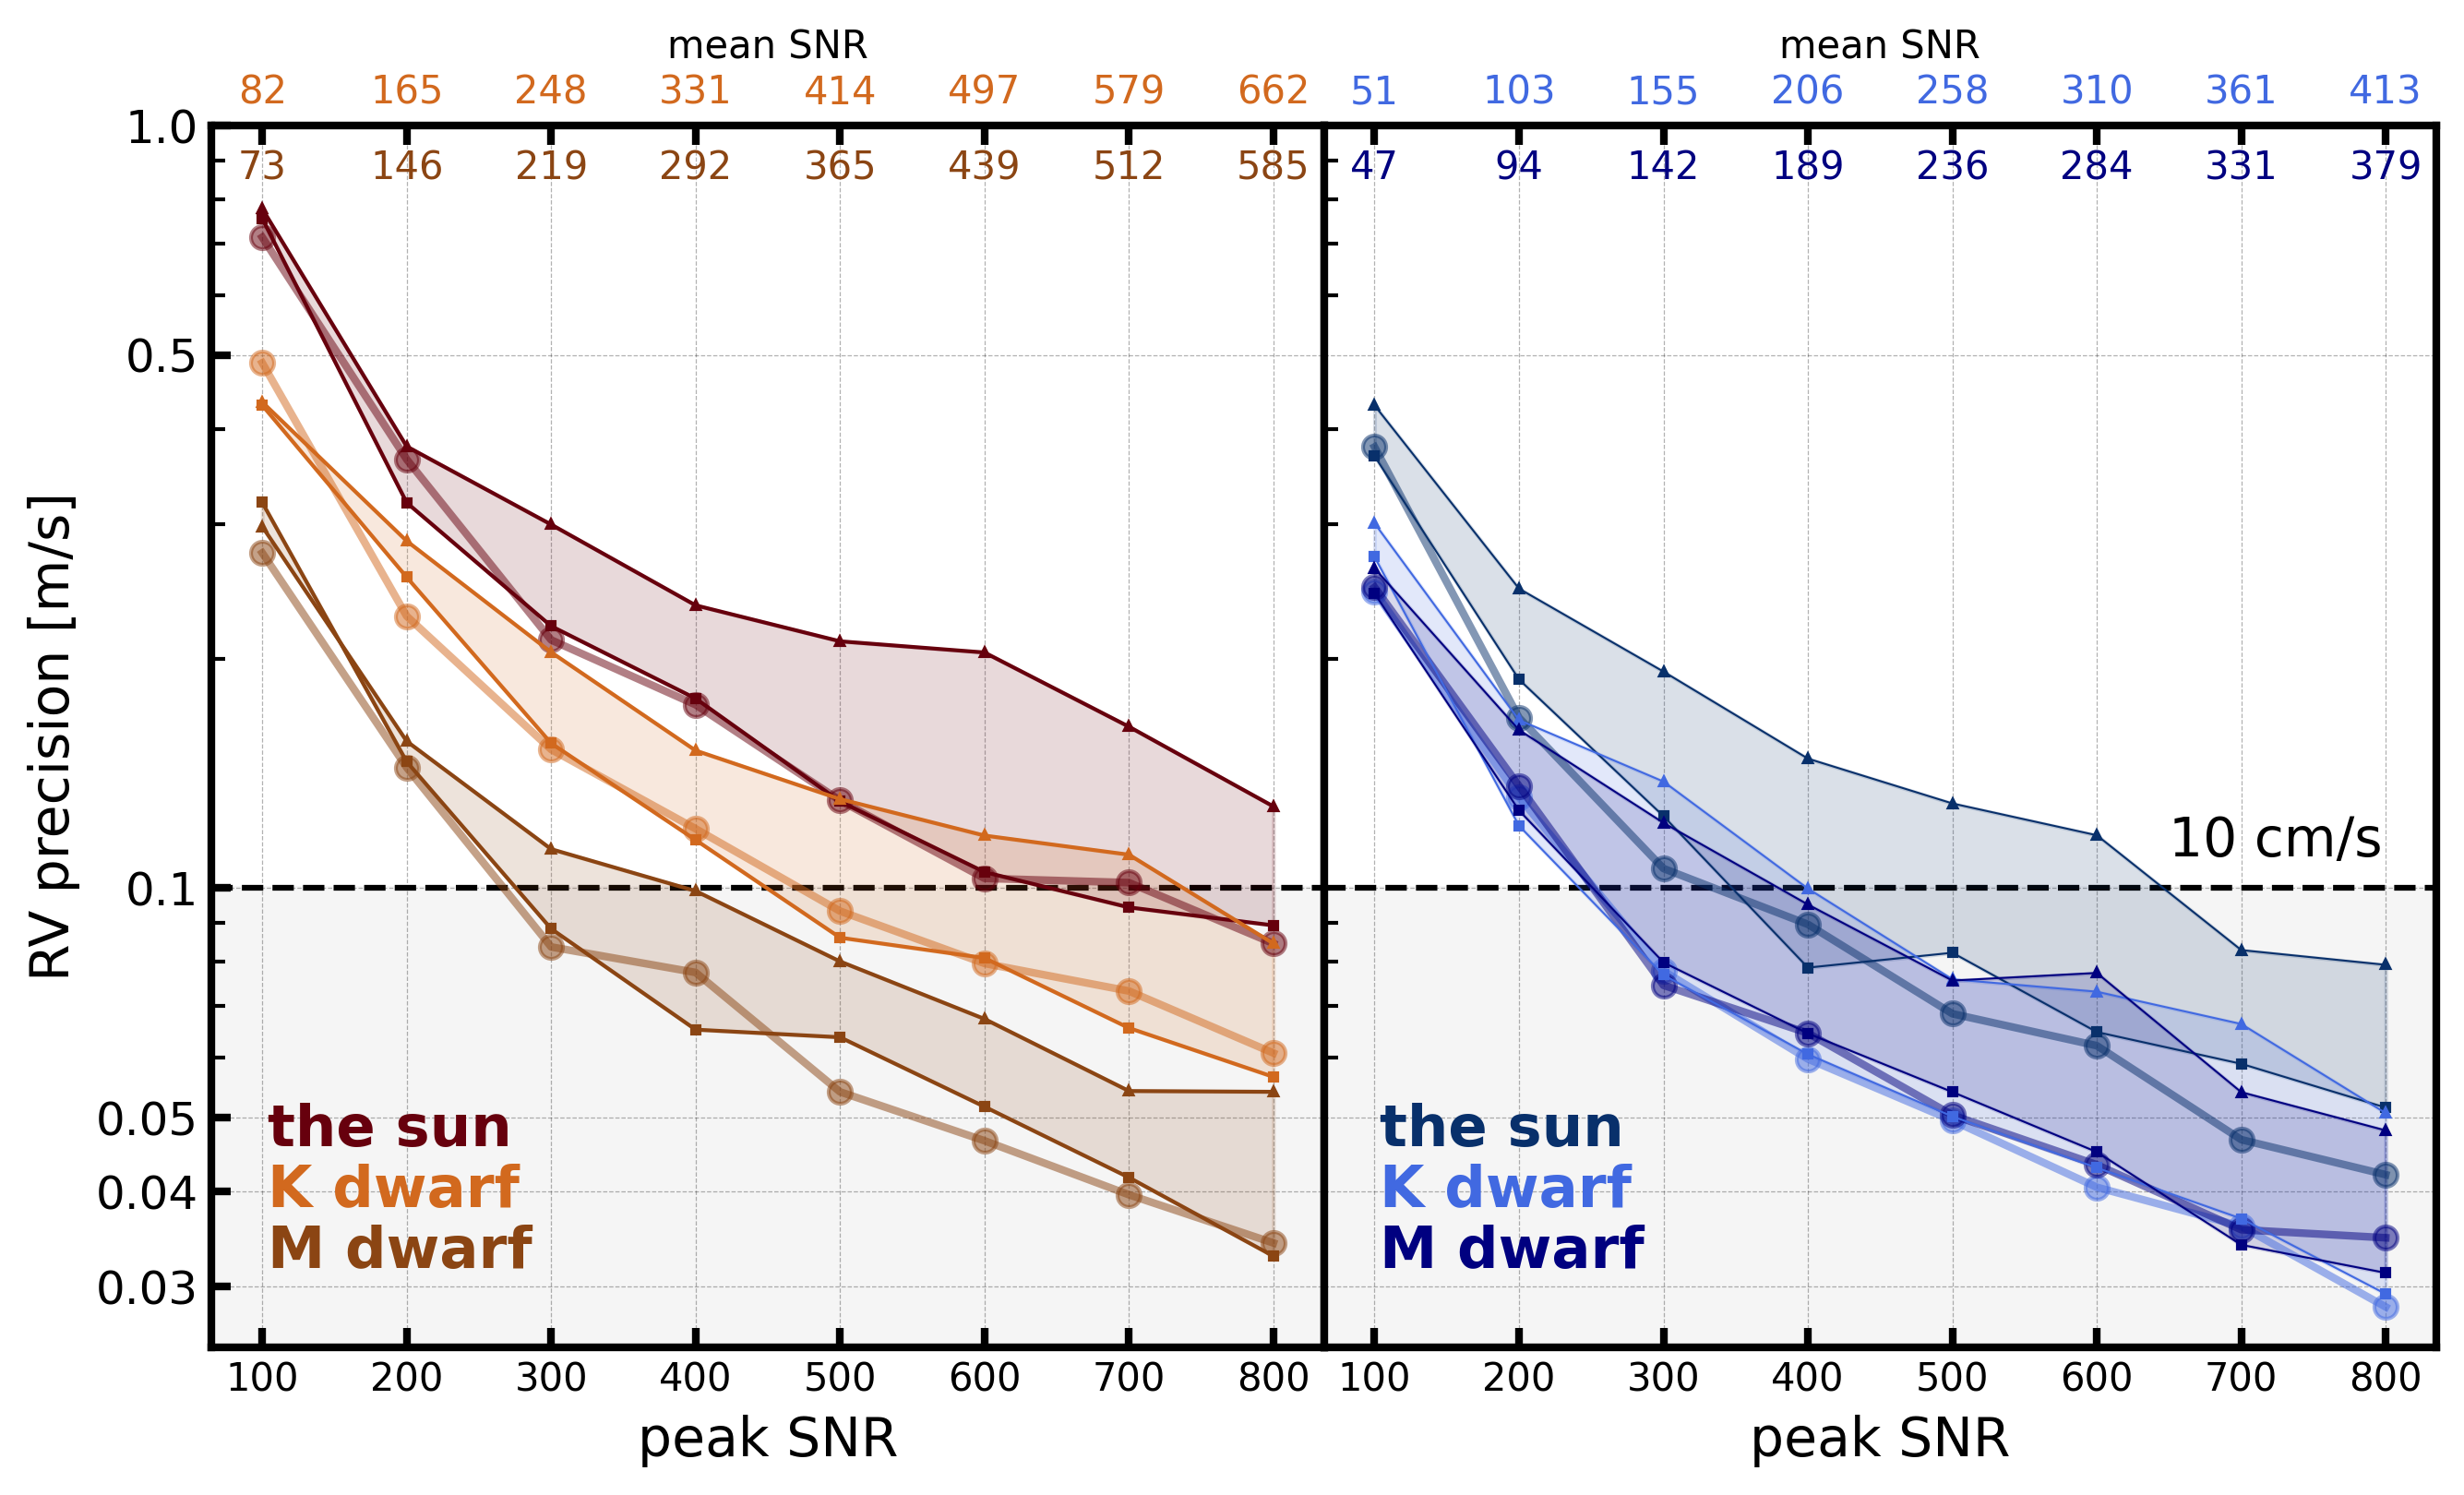

In [19]:
# Load data
pre_red = np.load('rv_precision_matrix.npz')['pre_red'][0:8, 4]
pre_blue = np.load('rv_precision_matrix.npz')['pre_blue'][0:8, 4]
pre_red_conservative, pre_red_optimize = np.load('rv_precision_cont.npz')['pre_red_conservative'], np.load('rv_precision_cont.npz')['pre_red_optimize']
pre_blue_conservative, pre_blue_optimize = np.load('rv_precision_cont.npz')['pre_blue_conservative'], np.load('rv_precision_cont.npz')['pre_blue_optimize']

data_k = np.load('rv_precision_cont_k.npz')
data_m = np.load('rv_precision_cont_m.npz')

pre_red_conservative_k, pre_red_optimize_k = data_k['pre_red_conservative'], data_k['pre_red_optimize']
pre_blue_conservative_k, pre_blue_optimize_k = data_k['pre_blue_conservative'], data_k['pre_blue_optimize']

pre_red_conservative_m, pre_red_optimize_m = data_m['pre_red_conservative'], data_m['pre_red_optimize']
pre_blue_conservative_m, pre_blue_optimize_m = data_m['pre_blue_conservative'], data_m['pre_blue_optimize']

# SNR values
SNR_values = np.arange(100, 801, 100)

# Colors
colors = {'red': plt.cm.Reds((4 + 3) / 6), 'blue': plt.cm.Blues((4 + 3) / 6)}
colors_k = {'red': 'chocolate', 'blue': 'royalblue'}
colors_m = {'red': 'saddlebrown', 'blue': 'navy'}

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 5.5), dpi=300, sharey=True, gridspec_kw={'wspace': 0})

# ---------- Left Subplot: Red Channel ----------
# the sun
axes[0].plot(SNR_values, pre_red_conservative, '^-', linewidth=1, ms=2, color=colors['red'], zorder=6)
axes[0].plot(SNR_values, pre_red_optimize, 's-', linewidth=1, ms=2, color=colors['red'], zorder=6)
axes[0].plot(SNR_values, pre_red, 'o-', color=colors['red'], linewidth=2, ms=6, zorder=5, alpha=0.5)
axes[0].fill_between(SNR_values, pre_red_conservative, pre_red_optimize, color=colors['red'], alpha=0.15, zorder=3)

# K dwarf
axes[0].plot(SNR_values, pre_red_conservative_k, '^-', linewidth=1, ms=2, color=colors_k['red'], zorder=6)
axes[0].plot(SNR_values, pre_red_optimize_k, 's-', linewidth=1, ms=2, color=colors_k['red'], zorder=6)
axes[0].plot(SNR_values, pre_red_k, 'o-', color=colors_k['red'], linewidth=2, ms=6, zorder=5, alpha=0.5)
axes[0].fill_between(SNR_values, pre_red_conservative_k, pre_red_optimize_k, color=colors_k['red'], alpha=0.15, zorder=3)

# M dwarf
axes[0].plot(SNR_values, pre_red_conservative_m, '^-', linewidth=1, ms=2, color=colors_m['red'], zorder=6)
axes[0].plot(SNR_values, pre_red_optimize_m, 's-', linewidth=1, ms=2, color=colors_m['red'], zorder=6)
axes[0].plot(SNR_values, pre_red_m, 'o-', color=colors_m['red'], linewidth=2, ms=6, zorder=5, alpha=0.5)
axes[0].fill_between(SNR_values, pre_red_conservative_m, pre_red_optimize_m, color=colors_m['red'], alpha=0.15, zorder=3)

# # ---------- Left Subplot: Red Channel ----------
# # the sun
# axes[0].plot(SNR_values, pre_red_conservative, '^-', linewidth=1, ms=6, color=colors['red'], zorder=6)
# axes[0].plot(SNR_values, pre_red_optimize, 's-', linewidth=1, ms=6, color=colors['red'], zorder=6)
# axes[0].plot(SNR_values, pre_red, 'o-', color=colors['red'], linewidth=1.8, ms=6, zorder=5, alpha=0.5)
# axes[0].fill_between(SNR_values, pre_red_conservative, pre_red_optimize, color=colors['red'], alpha=0.15, zorder=3)

# # K dwarf
# axes[0].plot(SNR_values, pre_red_conservative_k, '^-', linewidth=1, ms=6, color=colors_k['red'], zorder=6)
# axes[0].plot(SNR_values, pre_red_optimize_k, 's-', linewidth=1, ms=6, color=colors_k['red'], zorder=6)
# axes[0].plot(SNR_values, pre_red_k, 'o-', color=colors_k['red'], linewidth=1.8, ms=6, zorder=5, alpha=0.5)
# axes[0].fill_between(SNR_values, pre_red_conservative_k, pre_red_optimize_k, color=colors_k['red'], alpha=0.15, zorder=3)

# # M dwarf
# axes[0].plot(SNR_values, pre_red_conservative_m, '^-', linewidth=1, ms=6, color=colors_m['red'], zorder=6)
# axes[0].plot(SNR_values, pre_red_optimize_m, 's-', linewidth=1, ms=6, color=colors_m['red'], zorder=6)
# axes[0].plot(SNR_values, pre_red_m, 'o-', color=colors_m['red'], linewidth=1.8, ms=6, zorder=5, alpha=0.5)
# axes[0].fill_between(SNR_values, pre_red_conservative_m, pre_red_optimize_m, color=colors_m['red'], alpha=0.15, zorder=3)

axes[0].axhspan(0.01, 0.1, color='whitesmoke', zorder=0)
axes[0].axhline(y=0.1, color='k', linestyle='--', linewidth=1.5, zorder=1)
axes[0].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
axes[0].set_xlabel('peak SNR', fontsize=14)
axes[0].set_ylabel('RV precision [m/s]', fontsize=14)
axes[0].set_yscale('log')
axes[0].set_xticks(SNR_values)
axes[0].legend(fontsize=10, loc='lower left', frameon=False)

# annotate legend
axes[0].text(0.05, 0.2, 'the sun', transform=axes[0].transAxes, fontsize=15, fontweight='bold', color=colors['red'], ha='left', va='top')
axes[0].text(0.05, 0.15, 'K dwarf', transform=axes[0].transAxes, fontsize=15, fontweight='bold', color=colors_k['red'], ha='left', va='top')
axes[0].text(0.05, 0.1, 'M dwarf', transform=axes[0].transAxes, fontsize=15, fontweight='bold', color=colors_m['red'], ha='left', va='top')

# ---------- Right Subplot: Blue Channel ----------
# the sun
axes[1].plot(SNR_values, pre_blue_conservative, '^-', linewidth=0.5, ms=2, color=colors['blue'], zorder=6)
axes[1].plot(SNR_values, pre_blue_optimize, 's-', linewidth=0.5, ms=2, color=colors['blue'], zorder=6)
axes[1].plot(SNR_values, pre_blue, 'o-', color=colors['blue'], linewidth=2, ms=6, zorder=5, alpha=0.5)
axes[1].fill_between(SNR_values, pre_blue_conservative, pre_blue_optimize, color=colors['blue'], alpha=0.15, zorder=3)

# K dwarf
axes[1].plot(SNR_values, pre_blue_conservative_k, '^-', linewidth=0.5, ms=2, color=colors_k['blue'], zorder=6)
axes[1].plot(SNR_values, pre_blue_optimize_k, 's-', linewidth=0.5, ms=2, color=colors_k['blue'], zorder=6)
axes[1].plot(SNR_values, pre_blue_k, 'o-', color=colors_k['blue'], linewidth=2, ms=6, zorder=5, alpha=0.5)
axes[1].fill_between(SNR_values, pre_blue_conservative_k, pre_blue_optimize_k, color=colors_k['blue'], alpha=0.15, zorder=3)

# M dwarf
axes[1].plot(SNR_values, pre_blue_conservative_m, '^-', linewidth=0.5, ms=2, color=colors_m['blue'], zorder=6)
axes[1].plot(SNR_values, pre_blue_optimize_m, 's-', linewidth=0.5, ms=2, color=colors_m['blue'], zorder=6)
axes[1].plot(SNR_values, pre_blue_m, 'o-', color=colors_m['blue'], linewidth=2, ms=6, zorder=5, alpha=0.5)
axes[1].fill_between(SNR_values, pre_blue_conservative_m, pre_blue_optimize_m, color=colors_m['blue'], alpha=0.15, zorder=3)

# # ---------- Right Subplot: Blue Channel ----------
# # the sun
# axes[1].plot(SNR_values, pre_blue_conservative, '^-', linewidth=1, ms=6, color=colors['blue'], zorder=6)
# axes[1].plot(SNR_values, pre_blue_optimize, 's-', linewidth=1, ms=6, color=colors['blue'], zorder=6)
# axes[1].plot(SNR_values, pre_blue, 'o-', color=colors['blue'], linewidth=1.8, ms=6, zorder=5, alpha=0.5)
# axes[1].fill_between(SNR_values, pre_blue_conservative, pre_blue_optimize, color=colors['blue'], alpha=0.15, zorder=3)

# # K dwarf
# axes[1].plot(SNR_values, pre_blue_conservative_k, '^-', linewidth=1, ms=6, color=colors_k['blue'], zorder=6)
# axes[1].plot(SNR_values, pre_blue_optimize_k, 's-', linewidth=1, ms=6, color=colors_k['blue'], zorder=6)
# axes[1].plot(SNR_values, pre_blue_k, 'o-', color=colors_k['blue'], linewidth=1.8, ms=6, zorder=5, alpha=0.5)
# axes[1].fill_between(SNR_values, pre_blue_conservative_k, pre_blue_optimize_k, color=colors_k['blue'], alpha=0.15, zorder=3)

# # M dwarf
# axes[1].plot(SNR_values, pre_blue_conservative_m, '^-', linewidth=1, ms=6, color=colors_m['blue'], zorder=6)
# axes[1].plot(SNR_values, pre_blue_optimize_m, 's-', linewidth=1, ms=6, color=colors_m['blue'], zorder=6)
# axes[1].plot(SNR_values, pre_blue_m, 'o-', color=colors_m['blue'], linewidth=1.8, ms=6, zorder=5, alpha=0.5)
# axes[1].fill_between(SNR_values, pre_blue_conservative_m, pre_blue_optimize_m, color=colors_m['blue'], alpha=0.15, zorder=3)

axes[1].axhspan(0.01, 0.1, color='whitesmoke', zorder=0)
axes[1].axhline(y=0.1, color='k', linestyle='--', linewidth=1.5, zorder=1)
axes[1].annotate('10 cm/s', xy=(650, 0.11), fontsize=14, color='k', zorder=10)
axes[1].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5, zorder=0)
axes[1].set_xlabel('peak SNR', fontsize=14)
axes[1].tick_params(left=False, labelleft=False)

axes[1].text(0.05, 0.2, 'the sun', transform=axes[1].transAxes, fontsize=15, fontweight='bold', color=colors['blue'], ha='left', va='top')
axes[1].text(0.05, 0.15, 'K dwarf', transform=axes[1].transAxes, fontsize=15, fontweight='bold', color=colors_k['blue'], ha='left', va='top')
axes[1].text(0.05, 0.1, 'M dwarf', transform=axes[1].transAxes, fontsize=15, fontweight='bold', color=colors_m['blue'], ha='left', va='top')

# ---------- Formatting ----------
for ax in axes:
    ax.set_yticks([0.03, 0.04, 0.05, 0.1, 0.5, 1.0])
    ax.set_yticklabels([0.03, 0.04, 0.05, 0.1, 0.5, 1.0], fontsize=12)
    ax.set_ylim(0.025, 1.0)
    ax.tick_params(axis='both', which='major', width=2, length=5, direction='in')
    ax.tick_params(axis='both', which='minor', width=1, length=3.5, direction='in')
    ax.grid(True, linestyle='--', color='k', linewidth=0.3, alpha=0.3)

# Outer Boundary
for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(2)

# Left plot
ax_top_left = axes[0].twiny()
ax_top_left.set_xticks(SNR_values)
ax_top_left.set_xticklabels([int(i) for i in mean_SNR_red_k], color='chocolate', fontsize=10)
ax_top_left.tick_params(axis='x', which='major', direction='in', length=5, width=2)
ax_top_left.set_xlim(ax_left.get_xlim())
ax_top_left.set_xlabel('mean SNR', fontsize=10)
for xtick, label_k, label_m in zip(SNR_values, mean_SNR_red_k, mean_SNR_red_m):
    ax_top_left.text(xtick, 0.83, f"{int(label_m)}", transform=ax_top_left.transData,
                     fontsize=10, color='saddlebrown', ha='center', va='bottom')

# right plot
ax_top_right = axes[1].twiny()
ax_top_right.set_xticks(SNR_values)
ax_top_right.set_xticklabels([int(i) for i in mean_SNR_blue_k], color='royalblue', fontsize=10)
ax_top_right.tick_params(axis='x', which='major', direction='in', length=5, width=2)
ax_top_right.set_xlim(ax_left.get_xlim())
ax_top_right.set_xlabel('mean SNR', fontsize=10)
for xtick, label_k, label_m in zip(SNR_values, mean_SNR_blue_k, mean_SNR_blue_m):
    ax_top_right.text(xtick, 0.83, f"{int(label_m)}", transform=ax_top_right.transData,
                     fontsize=10, color='navy', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.savefig(os.path.join(pwd, 'output/paper_plots/discussion.png'), dpi=500)
plt.show()

---
## test

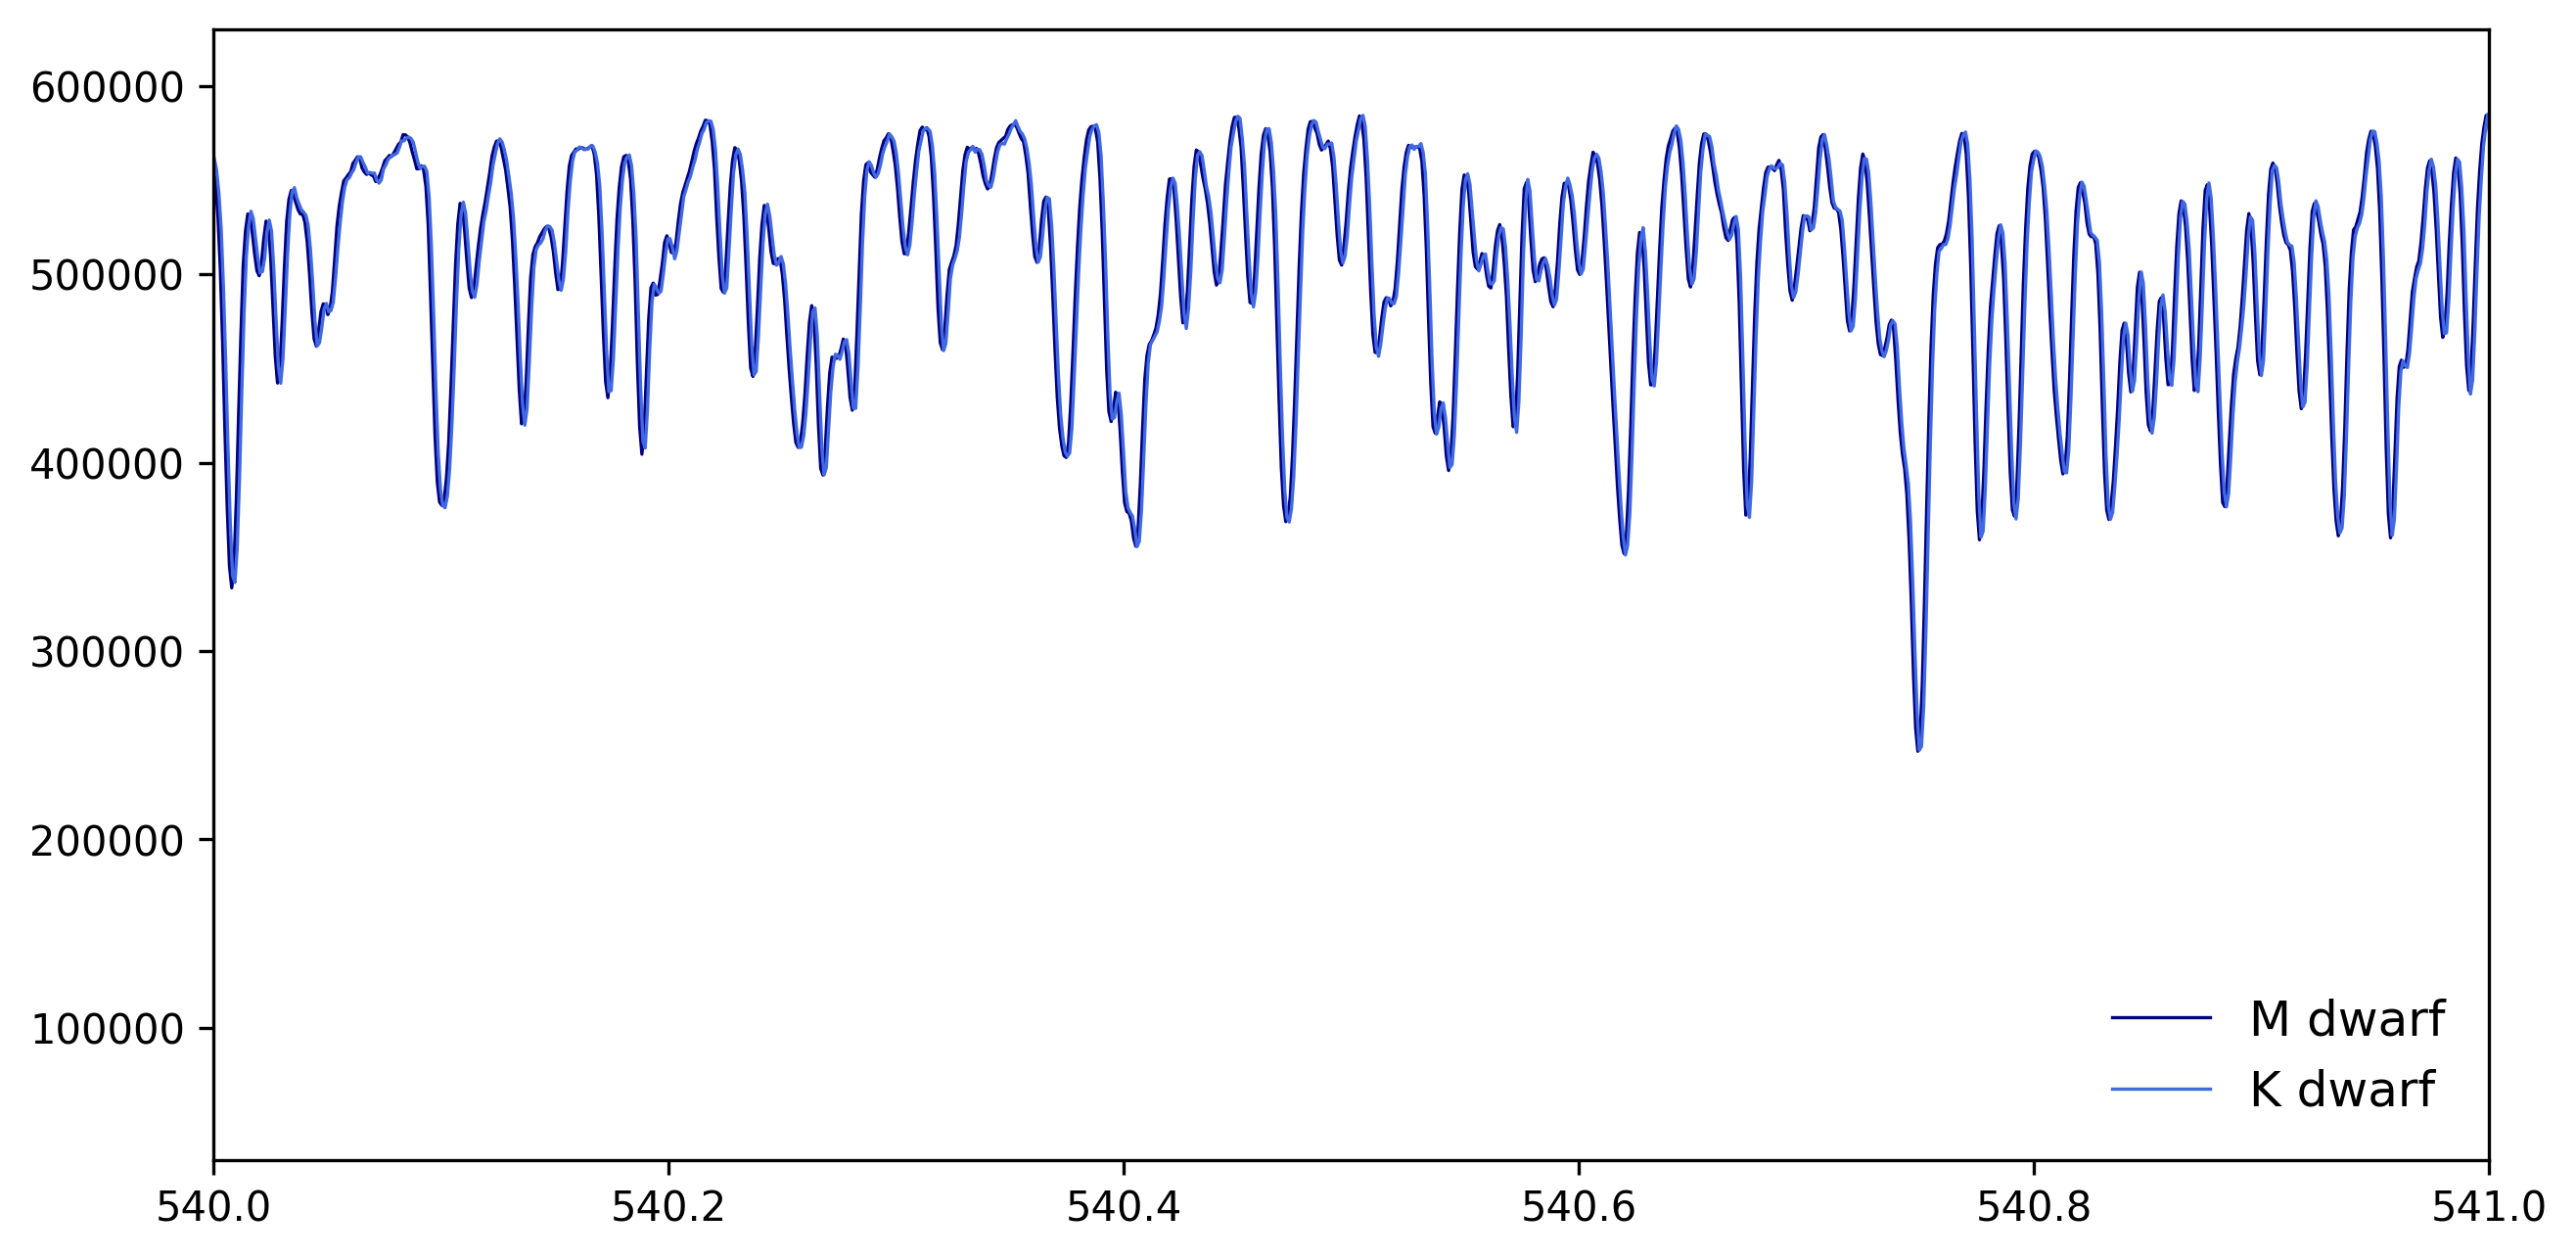

In [18]:
snr = 800
frac = 0.001
ispec = 0
order = 0
color = 'red'

output_folder1 = os.path.join(pwd, f"output/synfile_CHORUS_m/snr{snr}")
filename1 = f"{frac}_{ispec}_{color}.npz"
filepath1 = os.path.join(output_folder1, filename1)
data1 = np.load(filepath1)
wavelength1 = data['wavelength'][order, 0, :]
flux1 = data1['flux'][order, 0, :]

wavelength2 = data['wavelength'][order, 2, :]
flux2 = data1['flux'][order, 2, :]

# output_folder2 = os.path.join(pwd, f"output/synfile_CHORUS_k/snr{snr}")
# filename2 = f"{frac}_{ispec}_{color}.npz"
# filepath2 = os.path.join(output_folder2, filename1)
# data2 = np.load(filepath2)
# wavelength2 = data['wavelength'][order, 0, :]
# flux2 = data2['flux'][order, 0, :]

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(wavelength1, flux1, color='navy', linewidth=0.8, label='M dwarf')
plt.plot(wavelength2, flux2, color='royalblue', linewidth=0.8, label='K dwarf')

plt.xlim(540, 541)

plt.legend(fontsize=12, loc='lower right', frameon=False)